<a href="https://colab.research.google.com/github/YUCAVALCANTE/Tutorials_Linkedin/blob/main/Extra_Baggage_Revenue_Analysis_Using_Pandas_and_Machine_Learning_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extra Baggage Revenue Analysis Using Pandas and Machine Learning


## 1. Database Creation

To kick off this exciting project, I created a fictional database to simulate how **VoeBem Airlines** manages and profits from extra baggage fees. I used **Python**, along with the powerful **Pandas** and **NumPy** libraries, to generate realistic data about flights and passengers.

### Here’s a breakdown of the key elements I developed:

- **Flight Number**: Each flight has a unique number for easy identification.
- **Origin and Destination Airports**: I randomly selected these from a list of major Brazilian airports, ensuring that origin and destination are never the same.
- **Flight Dates**: Data spans from January 1, 2023, to the end of September 2024, with projections extending to the end of 2026.
- **Service Class**: Flights are categorized into Economy, Business, and First Class to cover all passenger types.
- **Fare Type**: Alternates between promotional and regular fares, providing flexibility and options for travelers.
- **Passenger Count**: Based on average seating capacity, with an occupancy rate varying from 70% to 100%, and an annual growth rate to simulate a gradual increase in passenger numbers over time.
- **Number and Weight of Bags**: Simulated independently for each passenger, based on statistical distributions that reflect typical traveler behavior.
- **Extra Baggage Revenue**: Calculated by considering various factors such as the number of bags, weight, service class, distance traveled, and seasonality, to reflect real market fluctuations.

I set a random seed in **NumPy** to ensure that results are reproducible with each code execution, which is essential for reliable analysis and future testing.

With all this information, I constructed a detailed and cohesive **DataFrame** that accurately reflects the airline’s operations related to extra baggage. This database not only enables in-depth exploratory analysis but also supports predictive models that help identify trends, understand seasonal impacts, and explore new strategies to boost revenue.

In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

data_inicio = '2023-01-01'
data_fim = '2024-09-30'
datas_voos = pd.date_range(start=data_inicio, end=data_fim, freq='H')

n_voos = len(datas_voos)

# Separation of domestic and international airports
aeroportos_domesticos = ['GRU', 'GIG', 'BSB', 'POA', 'REC', 'SSA', 'FOR', 'CWB', 'FLN', 'BEL', 'MAO', 'NAT', 'CGB', 'VCP', 'SDU', 'CGH', 'CNF', 'GYN', 'MCZ', 'SLZ']
aeroportos_internacionais = ['JFK', 'LAX', 'CDG', 'LHR', 'FRA', 'DXB', 'HND', 'SIN', 'AMS', 'YYZ', 'MAD', 'SYD', 'GRU', 'NRT', 'SFO', 'MIA']

# Combining both to generate flights
aeroportos = aeroportos_domesticos + aeroportos_internacionais

# Pairs of very close airports to be avoided as routes
aeroportos_proximos = [('CGH', 'GRU'), ('SDU', 'GIG'), ('JFK', 'LGA'), ('VCP', 'GRU')]  # Example of close pairs

# Function to check if a route is valid
def rota_valida(origem, destino, aeroportos_proximos):
    return (origem, destino) not in aeroportos_proximos and (destino, origem) not in aeroportos_proximos

# Generate 'Origin' and 'Destination' ensuring they are not the same and not too close
origens = np.random.choice(aeroportos, size=n_voos)
destinos = []

for origem in origens:
    destinos_possiveis = [aeroporto for aeroporto in aeroportos if aeroporto != origem and rota_valida(origem, aeroporto, aeroportos_proximos)]
    destino = random.choice(destinos_possiveis)
    destinos.append(destino)

# Determine if the flight is domestic or international based on airport lists
tipo_voo = [
    'Internacional' if (ori in aeroportos_domesticos and des in aeroportos_internacionais) or (ori in aeroportos_internacionais and des in aeroportos_domesticos)
    else 'Doméstico'
    for ori, des in zip(origens, destinos)
]

# Define seat ranges for each aircraft type
assentos_por_aeronave = {
    'Boeing 737': (130, 200),
    'Airbus A320': (140, 200),
    'Embraer 190': (80, 110),
    'Boeing 777': (300, 400),
    'Airbus A330': (250, 350)
}

# Simulating flight data considering seasonality
voos = pd.DataFrame({
    'Voo_ID': range(1, n_voos + 1),
    'Origem': origens,
    'Destino': destinos,
    'Tipo_Voo': tipo_voo,
    'Distancia': np.random.uniform(300, 3000, size=n_voos),
    'Data_Voo': datas_voos,
    'Dia_Semana': datas_voos.dayofweek + 1,
    'Tipo_Aeronave': np.random.choice(list(assentos_por_aeronave.keys()), size=n_voos),
    'Preco_Base': np.random.uniform(100, 1500, size=n_voos),
    'Promocao': np.random.choice([0, 1], size=n_voos, p=[0.7, 0.3]),
    'Concorrencia': np.random.randint(1, 6, size=n_voos),
    'Classe': np.random.choice(['Econômica', 'Executiva', 'Primeira Classe'], size=n_voos),
    'Temporada': np.random.choice(['Alta', 'Baixa'], size=n_voos),
    'Evento_Local': np.random.choice([0, 1], size=n_voos, p=[0.8, 0.2]),
})

# Generate the number of seats based on aircraft type
voos['Num_Assentos'] = voos['Tipo_Aeronave'].apply(lambda x: np.random.randint(*assentos_por_aeronave[x]))

print("Flight dates period:")
print("Minimum date:", voos['Data_Voo'].min())
print("Maximum date:", voos['Data_Voo'].max())


<ipython-input-1-c3685fc0020e>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datas_voos = pd.date_range(start=data_inicio, end=data_fim, freq='H')


Flight dates period:
Minimum date: 2023-01-01 00:00:00
Maximum date: 2024-09-30 00:00:00


In [2]:
print(voos.head())

   Voo_ID Origem Destino       Tipo_Voo    Distancia            Data_Voo  \
0       1    AMS     CWB  Internacional  2785.052545 2023-01-01 00:00:00   
1       2    SDU     BSB      Doméstico  2673.799278 2023-01-01 01:00:00   
2       3    CWB     MCZ      Doméstico  1533.615298 2023-01-01 02:00:00   
3       4    JFK     CGH  Internacional  1409.429743 2023-01-01 03:00:00   
4       5    MCZ     SDU      Doméstico  1798.524533 2023-01-01 04:00:00   

   Dia_Semana Tipo_Aeronave   Preco_Base  Promocao  Concorrencia     Classe  \
0           7    Boeing 737   489.815599         1             5  Executiva   
1           7    Boeing 737  1428.127272         0             3  Econômica   
2           7   Airbus A320   318.713787         0             2  Econômica   
3           7   Embraer 190   644.910984         0             3  Econômica   
4           7    Boeing 737   293.893818         0             5  Executiva   

  Temporada  Evento_Local  Num_Assentos  
0     Baixa             0 

In [3]:
import pandas as pd
import numpy as np
import random

# Additional assumptions
tarifa_por_quilo_extra = 50  # Cost per extra kilo in reais for domestic flights
tarifa_extra_internacional = 75  # Cost per extra kilo for international flights
taxa_crescimento_anual = 0.05  # 5% annual growth rate
probabilidade_excesso_bagagem = 0.3  # 30% chance of excess baggage

passageiros_list = []
passageiro_id = 1  # Passenger ID counter

# Function to calculate baggage weight based on class, with a specific flight variation factor
def calcular_peso_bagagem(num_bagagens, peso_min=15, peso_max=35, variacao_voo=0):
    return np.sum([np.random.uniform(peso_min + variacao_voo, peso_max + variacao_voo) for _ in range(num_bagagens)])

# Iterate over flights to generate passengers
for idx, voo in voos.iterrows():
    num_assentos = voo['Num_Assentos']
    ano_voo = voo['Data_Voo'].year - 2023

    # Apply annual growth rate based on the number of years since 2023
    taxa_crescimento = (1 + taxa_crescimento_anual) ** ano_voo

    # Additional randomness per flight
    variacao_ocupacao = np.random.uniform(-0.1, 0.1)  # Random occupancy variation (-10% to +10%)
    variacao_peso = np.random.uniform(-5, 5)  # Random baggage weight variation (-5 to +5 kg)

    # Adjustment for seasonality and specific events
    taxa_ocupacao = np.random.uniform(0.7, 1.0) + variacao_ocupacao  # Initializing base occupancy rate

    if voo['Temporada'] == 'Alta' or voo['Evento_Local'] == 1:
        taxa_ocupacao += 0.1
        variacao_peso += 2

    # Adjusting occupancy based on promotions, competition, and random flight variation
    if voo['Promocao'] == 1:
        taxa_ocupacao += 0.1
    if voo['Concorrencia'] >= 4:
        taxa_ocupacao -= 0.1

    # Number of passengers adjusted by occupancy and growth rate
    num_passageiros = int(min(num_assentos, num_assentos * taxa_ocupacao * taxa_crescimento))

    # Generate information for each passenger
    for _ in range(num_passageiros):
        classe = np.random.choice(['Econômica', 'Executiva', 'Primeira Classe'], p=[0.85, 0.1, 0.05])

        # Baggage allowance and number of bags per class
        if classe == 'Econômica':
            franquia = 23
            num_bagagens = 1
            if np.random.rand() < 0.5:
                variacao_peso += np.random.uniform(5, 15)  # Extra weight for economy class
        elif classe == 'Executiva':
            franquia = 64
            num_bagagens = 2
        else:
            franquia = 96
            num_bagagens = 3

        # Increase weight and number of bags for international or long flights
        if voo['Tipo_Voo'] == 'Internacional' or voo['Distancia'] > 2000:
            variacao_peso += 3
            if classe == 'Econômica':
                num_bagagens = np.random.choice([1, 2], p=[0.7, 0.3])

        # Decide if the passenger has excess baggage based on probability
        if np.random.rand() < probabilidade_excesso_bagagem:
            peso_bagagem = calcular_peso_bagagem(num_bagagens, peso_min=15, peso_max=35, variacao_voo=variacao_peso)
        else:
            # Baggage weight within allowance
            peso_bagagem = calcular_peso_bagagem(num_bagagens, peso_min=5, peso_max=franquia / num_bagagens, variacao_voo=0)

        # Calculate excess and extra baggage revenue
        peso_extra = max(0, peso_bagagem - franquia)

        # Adjust extra per-kilo cost based on competition and promotions
        tarifa_ajustada = tarifa_por_quilo_extra
        if voo['Concorrencia'] >= 4:
            tarifa_ajustada *= 0.9
        if voo['Promocao'] == 1:
            tarifa_ajustada *= 0.8

        receita_extra = peso_extra * (tarifa_extra_internacional if voo['Tipo_Voo'] == 'Internacional' else tarifa_ajustada)

        # Add passenger information to the list
        passageiro = {
            'Passageiro_ID': passageiro_id,
            'Voo_ID': voo['Voo_ID'],
            'Origem': voo['Origem'],
            'Destino': voo['Destino'],
            'Tipo_Voo': voo['Tipo_Voo'],
            'Distancia': voo['Distancia'],
            'Data_Voo': voo['Data_Voo'],
            'Dia_Semana': voo['Dia_Semana'],
            'Tipo_Aeronave': voo['Tipo_Aeronave'],
            'Classe': classe,
            'Preco_Base': voo['Preco_Base'],
            'Promocao': voo['Promocao'],
            'Concorrencia': voo['Concorrencia'],
            'Temporada': voo['Temporada'],
            'Evento_Local': voo['Evento_Local'],
            'Num_Bagagens': num_bagagens,
            'Peso_Bagagem': peso_bagagem,
            'Franquia_Bagagem': franquia,
            'Peso_Extra': peso_extra,
            'Receita_Bagagem_Extra': receita_extra
        }
        passageiros_list.append(passageiro)
        passageiro_id += 1

# Create DataFrame with passenger data
df = pd.DataFrame(passageiros_list)

# Format 'Data_Voo' column and add 'Year', 'Month', and 'Quarter' columns
df['Data_Voo'] = pd.to_datetime(df['Data_Voo'])
df['Ano'] = df['Data_Voo'].dt.year
df['Mes'] = df['Data_Voo'].dt.month
df['Trimestre'] = df['Data_Voo'].dt.to_period('Q')

# Display the first rows for verification
df.head()


,Passageiro_ID,Voo_ID,Origem,Destino,Tipo_Voo,Distancia,Data_Voo,Dia_Semana,Tipo_Aeronave,Classe,...,Temporada,Evento_Local,Num_Bagagens,Peso_Bagagem,Franquia_Bagagem,Peso_Extra,Receita_Bagagem_Extra,Ano,Mes,Trimestre
0,1,1,AMS,CWB,Internacional,2785.052545,2023-01-01,7,Boeing 737,Econômica,...,Baixa,0,1,11.193022,23,0.000000,0.000000,2023,1,2023Q1
1,2,1,AMS,CWB,Internacional,2785.052545,2023-01-01,7,Boeing 737,Econômica,...,Baixa,0,1,5.196282,23,0.000000,0.000000,2023,1,2023Q1
2,3,1,AMS,CWB,Internacional,2785.052545,2023-01-01,7,Boeing 737,Econômica,...,Baixa,0,1,58.184572,23,35.184572,2638.842868,2023,1,2023Q1
3,4,1,AMS,CWB,Internacional,2785.052545,2023-01-01,7,Boeing 737,Econômica,...,Baixa,0,2,14.516748,23,0.000000,0.000000,2023,1,2023Q1
4,5,1,AMS,CWB,Internacional,2785.052545,2023-01-01,7,Boeing 737,Econômica,...,Baixa,0,1,61.210039,23,38.210039,2865.752937,2023,1,2023Q1


In [4]:
print("Period of dates in df:")
print("Minimum Date:", df['Data_Voo'].min())
print("Maximum Date:", df['Data_Voo'].max())

print("Unique Years in df:", df['Ano'].unique())
print("Unique Months in df:", df['Mes'].unique())


Period of dates in df:
Minimum Date: 2023-01-01 00:00:00
Maximum Date: 2024-09-30 00:00:00
Unique Years in df: [2023 2024]
Unique Months in df: [ 1  2  3  4  5  6  7  8  9 10 11 12]


# 2. Exploratory Data Analysis (EDA)

In this section, we'll dive into the data to uncover key patterns and insights related to extra baggage revenue. The EDA process will help us understand the distribution of baggage weight, identify trends across different passenger classes, and explore how various factors (such as seasonality, distance, and promotions) impact extra baggage revenue.

### Key EDA Steps:
1. **Descriptive Statistics**: We'll start by examining basic statistics to get a sense of the overall data structure and identify any anomalies.
2. **Revenue by Service Class**: Analyzing how extra baggage revenue varies between Economy, Business, and First Class, and identifying which class contributes the most to revenue.
3. **Top Revenue-Generating Routes**: Identifying the most profitable routes for extra baggage revenue, helping us see which flight paths could be prioritized for strategic initiatives.
4. **Seasonal Patterns and Trends**: Examining how revenue fluctuates across quarters, particularly during high-travel seasons and holiday periods.
5. **Passenger Behavior Analysis**: Understanding passenger behavior patterns, including the average baggage weight per passenger and frequency of excess baggage occurrences.

These insights will serve as the foundation for the forecasting and predictive models in the next phase, allowing us to make data-driven decisions to maximize revenue.


In [5]:
# 1. Extra Baggage Revenue by Service Class
receita_por_classe = df.groupby('Classe')['Receita_Bagagem_Extra'].mean()
print("Average Extra Baggage Revenue by Class:")
print(receita_por_classe)

# 2. Percentage of Passengers with Excess Baggage
pct_excesso_bagagem = (df[df['Peso_Extra'] > 0].shape[0] / df.shape[0]) * 100
print(f'\nPercentage of Passengers with Excess Baggage: {pct_excesso_bagagem:.2f}%')

# 3. Extra Baggage Revenue by Route
df['Rota'] = df['Origem'] + '-' + df['Destino']
receita_por_rota = df.groupby('Rota')['Receita_Bagagem_Extra'].sum().sort_values(ascending=False)
print("\nTop 10 Routes by Extra Baggage Revenue:")
print(receita_por_rota.head(10))

# 4. Average Baggage Weight per Passenger
peso_medio_bagagem = df['Peso_Bagagem'].mean()
print(f'\nAverage Baggage Weight per Passenger: {peso_medio_bagagem:.2f} kg')

# 5. Excess Baggage Occurrence Rate by Route
df['Excesso_Bagagem'] = df['Peso_Extra'] > 0
excesso_por_rota = df.groupby('Rota')['Excesso_Bagagem'].mean().sort_values(ascending=False) * 100
print("\nTop 10 Routes by Excess Baggage Rate:")
print(excesso_por_rota.head(10))

# 6. Extra Baggage Revenue by Flight Type (Domestic vs. International)
receita_por_tipo_voo = df.groupby('Tipo_Voo')['Receita_Bagagem_Extra'].sum()
print("\nExtra Baggage Revenue by Flight Type:")
print(receita_por_tipo_voo)


Average Extra Baggage Revenue by Class:
Classe
Econômica          18642.212297
Executiva          28927.632431
Primeira Classe    43476.600592
Name: Receita_Bagagem_Extra, dtype: float64

Percentage of Passengers with Excess Baggage: 29.94%

Top 10 Routes by Extra Baggage Revenue:
Rota
GRU-LAX    2.204540e+08
GRU-DXB    2.166091e+08
GRU-LHR    2.080495e+08
HND-GRU    2.053965e+08
SIN-GRU    1.913988e+08
GRU-JFK    1.836971e+08
GRU-NAT    1.805036e+08
GRU-SYD    1.796262e+08
CGB-GRU    1.765345e+08
BEL-GRU    1.762355e+08
Name: Receita_Bagagem_Extra, dtype: float64

Average Baggage Weight per Passenger: 345.67 kg

Top 10 Routes by Excess Baggage Rate:
Rota
CNF-GIG    33.818939
SDU-FRA    33.511269
FOR-SFO    33.049738
FRA-MAD    32.844575
FOR-CWB    32.811594
SFO-MAD    32.773973
HND-GYN    32.620614
CGH-SFO    32.614884
SLZ-SFO    32.510578
CNF-MCZ    32.419879
Name: Excesso_Bagagem, dtype: float64

Extra Baggage Revenue by Flight Type:
Tipo_Voo
Doméstico        1.488332e+10
Internacio

In [6]:
import plotly.graph_objects as go

# Data preparation
average_revenue_by_class = df.groupby('Classe')['Receita_Bagagem_Extra'].mean()

# Define colors for each class
colors = ['#4E79A7', '#F28E2B', '#E15759']

# Create a Plotly figure
fig = go.Figure()

# Add bars for each service class
for i, (service_class, revenue) in enumerate(average_revenue_by_class.items()):
    fig.add_trace(go.Bar(
        x=[service_class],
        y=[revenue],
        name=service_class,
        marker_color=colors[i],
        text=f'{revenue:.2f}',  # Add the revenue as text
        textposition='outside'
    ))

# Update layout with titles and labels
fig.update_layout(
    title="Average Extra Baggage Revenue by Service Class",
    xaxis_title="Service Class",
    yaxis_title="Average Extra Baggage Revenue (R$)",
    template="plotly_white",
    title_font=dict(size=20, family='Arial', color='#333'),
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    showlegend=False  # Disable legend as each bar has a unique label
)

# Show the interactive Plotly figure
fig.show()


In [7]:

# Ensure 'Trimestre' column is present and grouped data is calculated
df['Trimestre'] = df['Data_Voo'].dt.to_period('Q')
average_revenue_by_class_quarter = df.groupby(['Classe', 'Trimestre'])['Receita_Bagagem_Extra'].mean().unstack()

# Convert quarter periods to strings for Plotly compatibility
average_revenue_by_class_quarter.columns = average_revenue_by_class_quarter.columns.astype(str)

# Create Plotly figure
fig = go.Figure()

# Add traces for each service class
for service_class, color in zip(average_revenue_by_class_quarter.index, ['#4E79A7', '#F28E2B', '#E15759']):
    fig.add_trace(go.Scatter(
        x=average_revenue_by_class_quarter.columns,
        y=average_revenue_by_class_quarter.loc[service_class],
        mode='lines+markers+text',
        name=service_class,
        line=dict(color=color, width=3),
        marker=dict(size=8, color=color),
        text=[f'{val:.2f}' for val in average_revenue_by_class_quarter.loc[service_class]],
        textposition="top center"
    ))

# Customize layout with titles, axes labels, and style adjustments
fig.update_layout(
    title="Average Extra Baggage Revenue per Quarter by Service Class",
    xaxis_title="Quarter",
    yaxis_title="Average Extra Baggage Revenue (R$)",
    template="plotly_white",
    title_font=dict(size=20, family='Arial', color='#333'),
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    legend_title_text='Service Class'
)

# Show the Plotly figure
fig.show()


In [8]:
# Ensure the 'Trimestre' column is in the DataFrame
df['Trimestre'] = df['Data_Voo'].dt.to_period('Q')

# Calculate the percentage of passengers with excess baggage per quarter
excess_baggage_by_quarter = df[df['Peso_Extra'] > 0].groupby('Trimestre').size() / df.groupby('Trimestre').size() * 100

# Create a Plotly line chart
fig = go.Figure()

# Add trace for the excess baggage percentage over quarters
fig.add_trace(go.Scatter(
    x=excess_baggage_by_quarter.index.astype(str),
    y=excess_baggage_by_quarter.values,
    mode='lines+markers+text',
    text=[f'{val:.2f}%' for val in excess_baggage_by_quarter.values],
    textposition="top center",
    line=dict(color='#4E79A7', width=3),
    marker=dict(size=8, color='#4E79A7'),
))

# Update layout with titles and customizations
fig.update_layout(
    title="Percentage of Passengers with Excess Baggage per Quarter",
    xaxis_title="Quarter",
    yaxis_title="Percentage of Passengers (%)",
    template="plotly_white",
    title_font=dict(size=20, family='Arial', color='#333'),
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
)

# Display the chart
fig.show()


In [11]:
import plotly.express as px
import pandas as pd

# Step 1: Calculate Extra Baggage Revenue per Route
df['Route'] = df['Origem'] + '-' + df['Destino']  # Create a 'Route' column in `df` if not already done
df_top_10_rotas = df.groupby('Route')['Receita_Bagagem_Extra'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Plot the Top 10 Routes by Extra Baggage Revenue using Plotly
fig = px.bar(df_top_10_rotas,
             x='Receita_Bagagem_Extra',
             y='Route',
             orientation='h',
             title="Top 10 Routes by Extra Baggage Revenue",
             text='Receita_Bagagem_Extra',
             color='Receita_Bagagem_Extra',
             color_continuous_scale='Blues')

# Step 3: Update layout
fig.update_layout(
    xaxis_title="Extra Baggage Revenue (R$)",
    yaxis_title="Route",
    title_font=dict(size=20),
    template="plotly_white",
    yaxis={'categoryorder':'total ascending'}
)

# Step 4: Format values to display in millions with two decimal places
fig.update_traces(
    texttemplate='%{text:.2s}M',  # Display values in millions (e.g., "200M")
    textposition='outside'
)

# Step 5: Update the color bar
fig.update_layout(coloraxis_colorbar=dict(
    title="Extra Baggage Revenue",
    tickvals=[180000000, 200000000, 220000000, 240000000],
    ticktext=["180M", "200M", "220M", "240M"]
))

# Display the chart
fig.show()


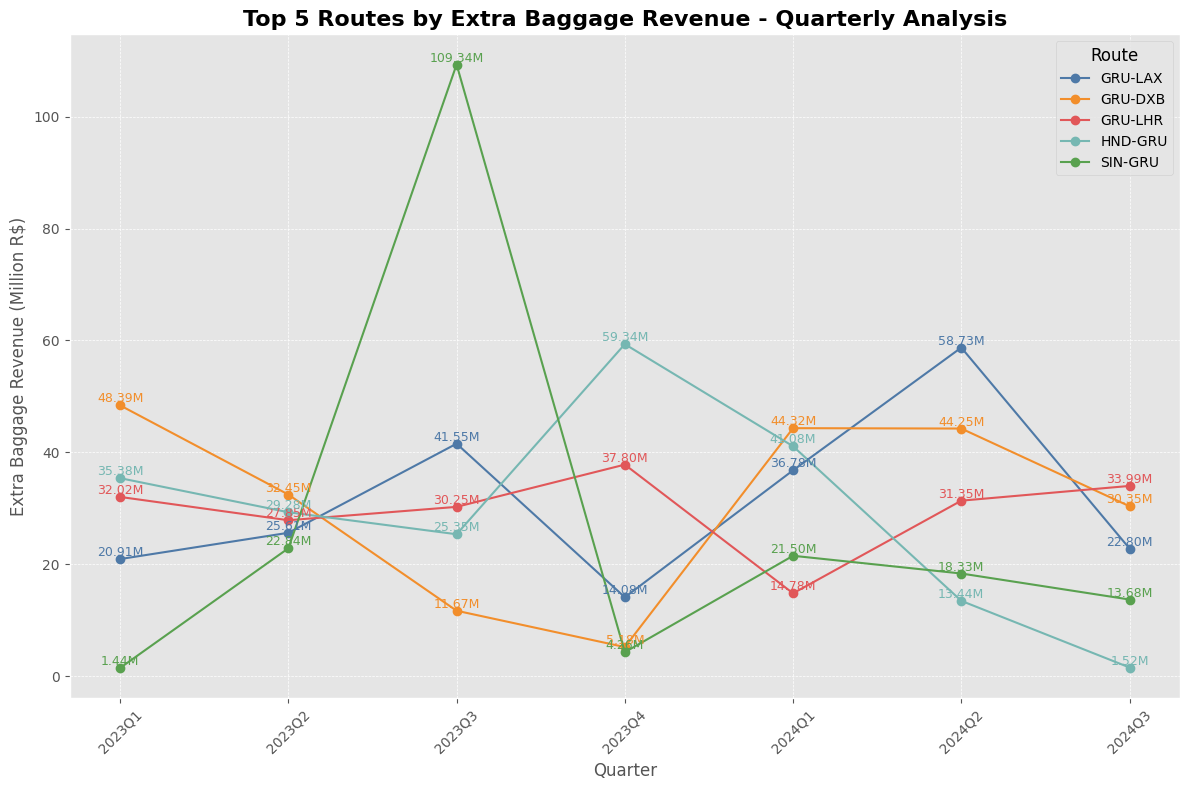

In [13]:
import matplotlib.pyplot as plt

# Create 'Rota' column in the DataFrame
df['Rota'] = df['Origem'] + '-' + df['Destino']

# Group data to get extra baggage revenue by route and quarter
receita_por_rota_trimestre = df.groupby(['Rota', 'Trimestre'])['Receita_Bagagem_Extra'].sum().unstack()

# Select the 5 most profitable routes in total extra baggage revenue
top_5_rotas = receita_por_rota_trimestre.sum(axis=1).nlargest(5).index
receita_top_5_rotas = receita_por_rota_trimestre.loc[top_5_rotas]

# Convert quarters to strings to avoid matplotlib issues
receita_top_5_rotas.columns = receita_top_5_rotas.columns.astype(str)

# Configure style and colors for the plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Plot line graph for the top 5 routes
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']  # Define colors for each route
for i, rota in enumerate(receita_top_5_rotas.index):
    plt.plot(receita_top_5_rotas.columns, receita_top_5_rotas.loc[rota] / 1e6, marker='o', label=rota, color=colors[i])

# Titles and labels
plt.title('Top 5 Routes by Extra Baggage Revenue - Quarterly Analysis', fontsize=16, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Extra Baggage Revenue (Million R$)', fontsize=12)

# Display values on each point
for i, rota in enumerate(receita_top_5_rotas.index):
    for x, y in zip(receita_top_5_rotas.columns, receita_top_5_rotas.loc[rota] / 1e6):
        plt.text(x, y, f'{y:.2f}M', ha='center', va='bottom', fontsize=9, color=colors[i])

# Legend, gridlines, and formatting adjustments
plt.legend(title='Route', fontsize=10, title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


<ipython-input-14-c29ce6f8dea6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



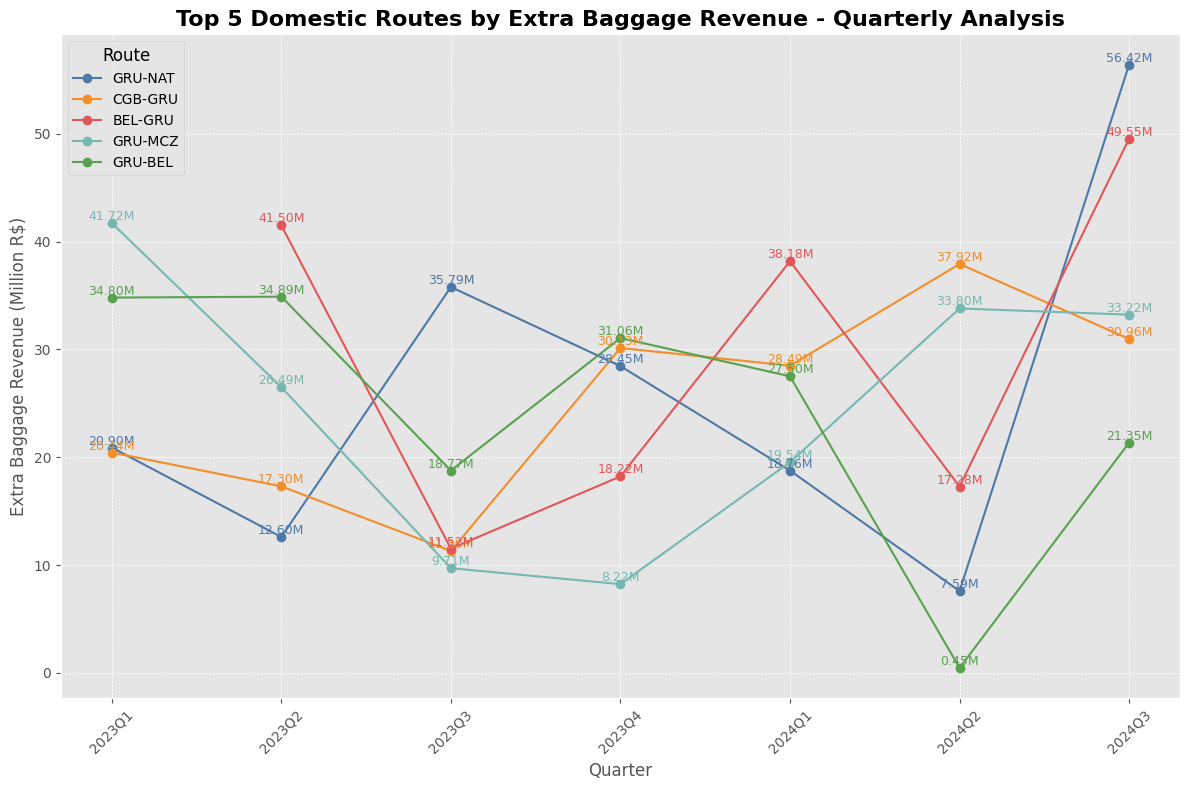

In [14]:
# Filter only domestic flights with both airports in the domestic airport list
df_domestic = df[(df['Origem'].isin(aeroportos_domesticos)) & (df['Destino'].isin(aeroportos_domesticos))]

# Create a Route column in the domestic flights DataFrame
df_domestic['Route'] = df_domestic['Origem'] + '-' + df_domestic['Destino']

# Group data to get extra baggage revenue by route and quarter
revenue_by_route_quarter_domestic = df_domestic.groupby(['Route', 'Trimestre'])['Receita_Bagagem_Extra'].sum().unstack()

# Select the top 5 most profitable domestic routes by total extra baggage revenue
top_5_routes_domestic = revenue_by_route_quarter_domestic.sum(axis=1).nlargest(5).index
top_5_revenue_routes_domestic = revenue_by_route_quarter_domestic.loc[top_5_routes_domestic]

# Convert quarters to strings to avoid matplotlib issues
top_5_revenue_routes_domestic.columns = top_5_revenue_routes_domestic.columns.astype(str)

# Configure style and colors for the plot
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Plot line graph for the top 5 domestic routes
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']  # Define colors for each route
for i, route in enumerate(top_5_revenue_routes_domestic.index):
    plt.plot(
        top_5_revenue_routes_domestic.columns,
        top_5_revenue_routes_domestic.loc[route] / 1e6,
        marker='o',
        label=route,
        color=colors[i]
    )

# Titles and labels in English
plt.title('Top 5 Domestic Routes by Extra Baggage Revenue - Quarterly Analysis', fontsize=16, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Extra Baggage Revenue (Million R$)', fontsize=12)

# Display values at each point in millions
for i, route in enumerate(top_5_revenue_routes_domestic.index):
    for x, y in zip(top_5_revenue_routes_domestic.columns, top_5_revenue_routes_domestic.loc[route] / 1e6):
        plt.text(x, y, f'{y:.2f}M', ha='center', va='bottom', fontsize=9, color=colors[i])

# Legend, gridlines, and formatting adjustments
plt.legend(title='Route', fontsize=10, title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


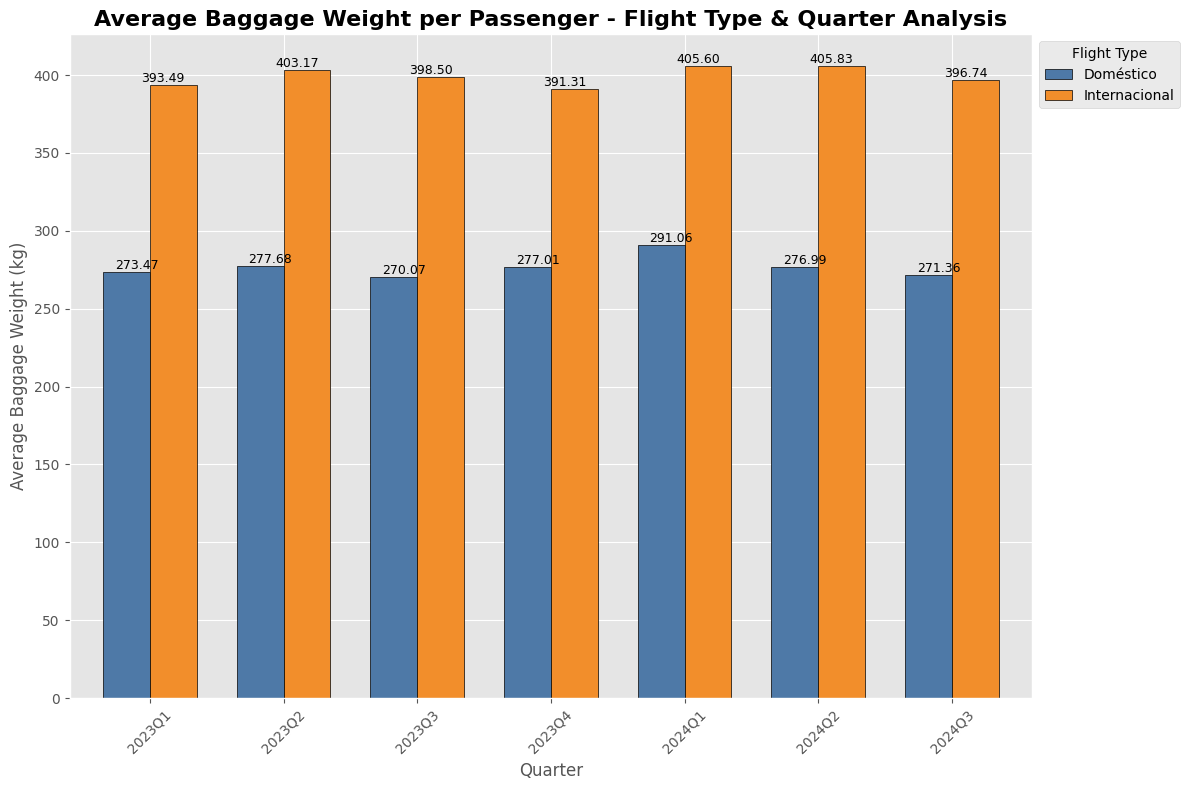

In [15]:
# Group data to get average baggage weight per flight type and quarter
avg_baggage_weight_per_quarter = df.groupby(['Trimestre', 'Tipo_Voo'])['Peso_Bagagem'].mean().unstack()

# Set plot style and colors
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bar chart for average baggage weight by flight type and quarter
avg_baggage_weight_per_quarter.plot(kind='bar', stacked=False, color=['#4E79A7', '#F28E2B'], edgecolor='black', width=0.7, ax=ax)

# Titles and labels in English
ax.set_title('Average Baggage Weight per Passenger - Flight Type & Quarter Analysis', fontsize=16, weight='bold')
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Average Baggage Weight (kg)', fontsize=12)

# Display values on each bar
for i, quarter in enumerate(avg_baggage_weight_per_quarter.index):
    for j, flight_type in enumerate(avg_baggage_weight_per_quarter.columns):
        weight = avg_baggage_weight_per_quarter.loc[quarter, flight_type]
        ax.text(i + (j - 0.5) * 0.2, weight, f'{weight:.2f}', ha='center', va='bottom', fontsize=9, color='black')

# Adjust legend to avoid overlap
ax.legend(title='Flight Type', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


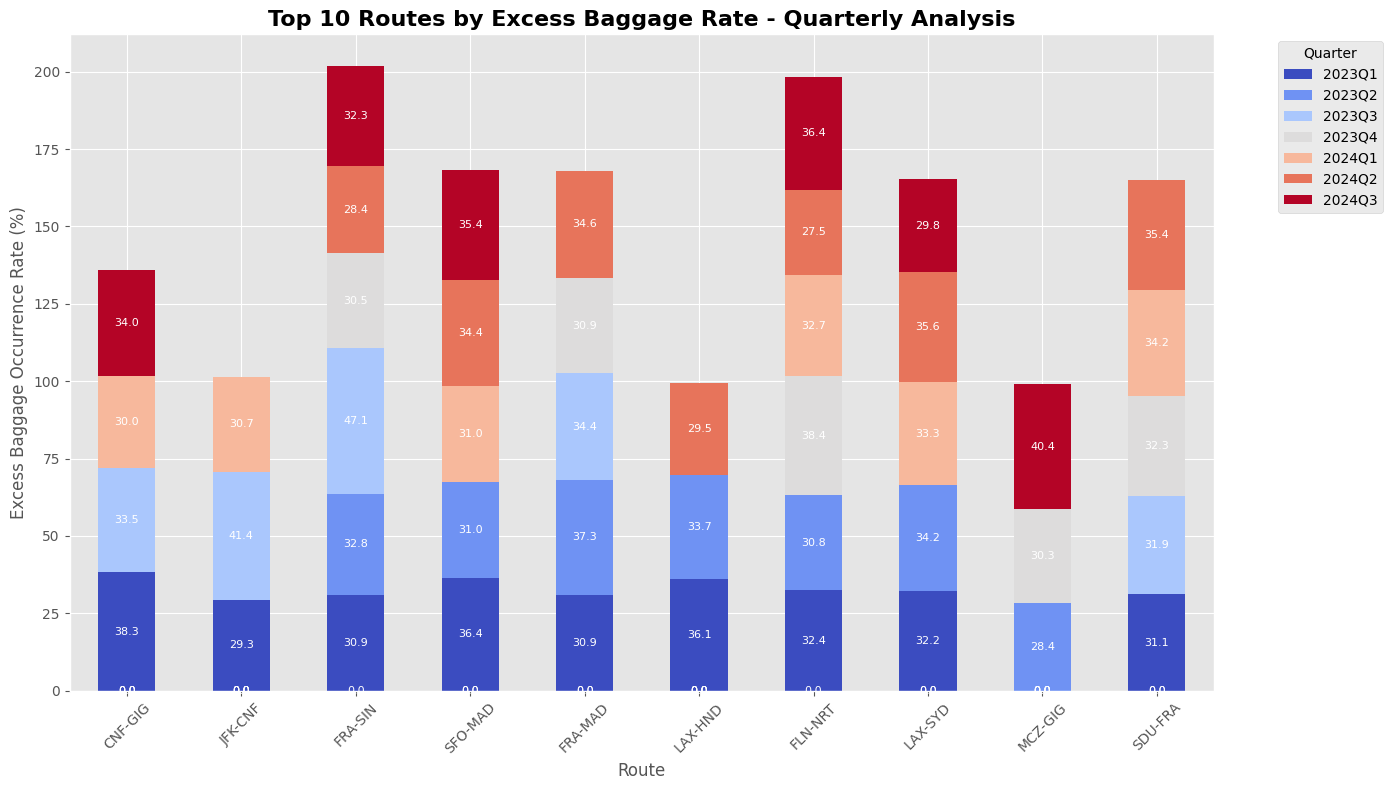

In [16]:
import matplotlib.pyplot as plt

# Create 'Route' column in the DataFrame for passengers
df['Route'] = df['Origem'] + '-' + df['Destino']

# Add 'Excess Baggage' column as a boolean indicator (1 for excess, 0 for no excess)
df['Excess_Baggage'] = df['Peso_Extra'] > 0

# Calculate the excess baggage occurrence rate by Route and Quarter
excess_by_route_quarter = df.groupby(['Route', 'Trimestre'])['Excess_Baggage'].mean() * 100

# Select the top 10 routes with the highest total excess baggage rate
top_10_routes = excess_by_route_quarter.groupby('Route').mean().nlargest(10).index
excess_top_10_routes = excess_by_route_quarter.loc[top_10_routes]

# Pivot data to an appropriate format for stacked bar chart
excess_top_10_routes_pivot = excess_top_10_routes.unstack(level='Trimestre')

# Set up style and figure size
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14, 8))

# Stacked bar chart for each route
excess_top_10_routes_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')

# Titles and labels in English
ax.set_title('Top 10 Routes by Excess Baggage Rate - Quarterly Analysis', fontsize=16, weight='bold')
ax.set_xlabel('Route', fontsize=12)
ax.set_ylabel('Excess Baggage Occurrence Rate (%)', fontsize=12)
ax.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display values on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=8, color='white')

# Adjust x-tick rotation and layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


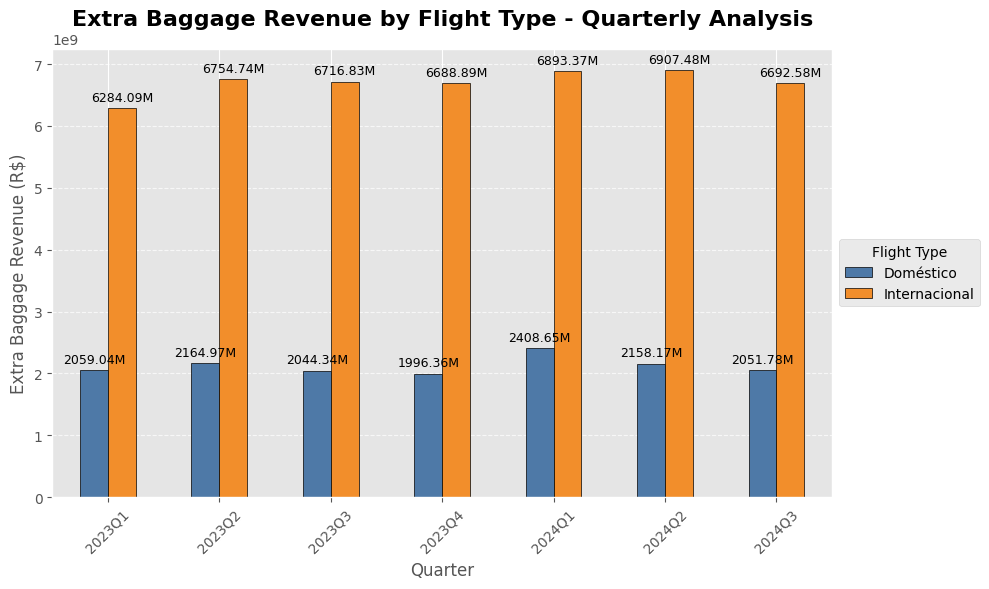

In [17]:
import matplotlib.pyplot as plt

# Group data to calculate extra baggage revenue by flight type and quarter
extra_baggage_revenue_by_flight_type_quarter = df.groupby(['Trimestre', 'Tipo_Voo'])['Receita_Bagagem_Extra'].sum().unstack()

# Set up plot style and colors
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a side-by-side bar chart to compare extra baggage revenue per flight type and quarter
extra_baggage_revenue_by_flight_type_quarter.plot(kind='bar', stacked=False, color=['#4E79A7', '#F28E2B'], edgecolor='black', ax=ax)

# Titles and labels in English
ax.set_title('Extra Baggage Revenue by Flight Type - Quarterly Analysis', fontsize=16, weight='bold')
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Extra Baggage Revenue (R$)', fontsize=12)

# Move the legend outside the plot area
ax.legend(title='Flight Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Display values on each bar, formatted in millions (M)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v/1e6:.2f}M' for v in container.datavalues], label_type='edge', fontsize=9, padding=3)

# Adjust layout to prevent clipping
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


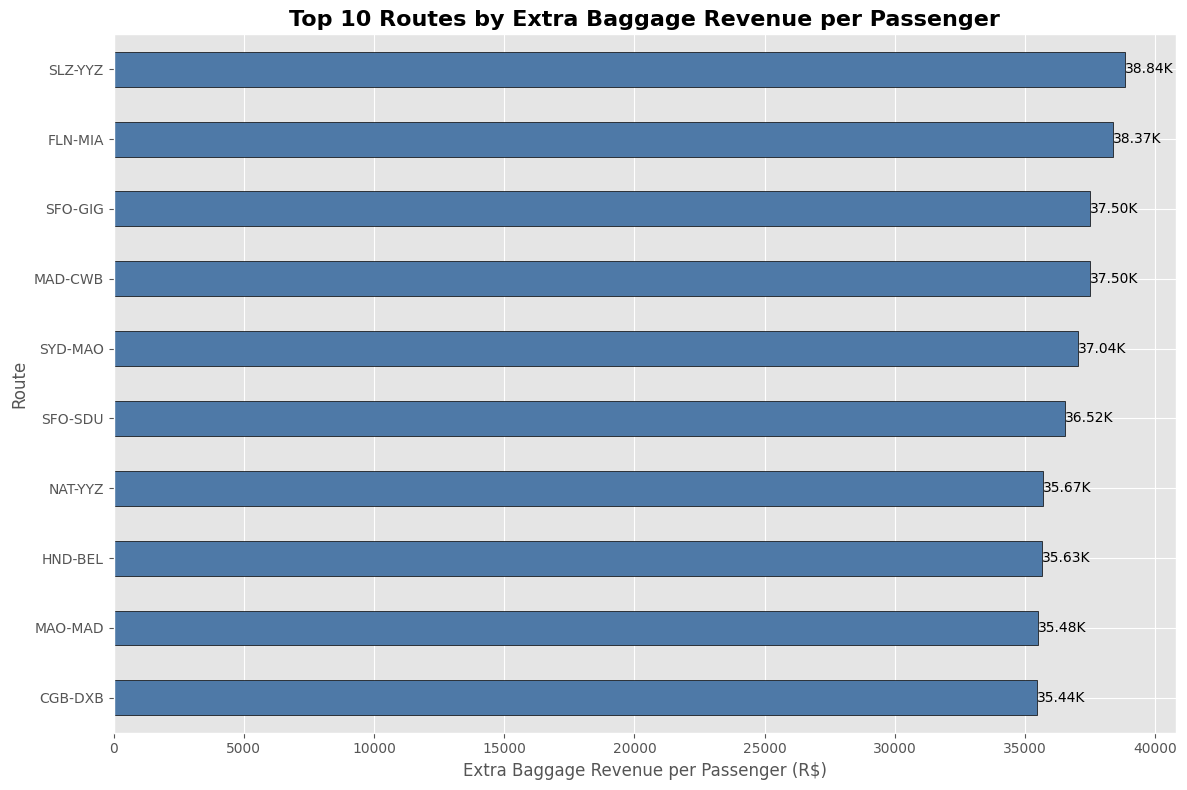

In [18]:
import matplotlib.pyplot as plt

# Calculate extra baggage revenue per passenger for each route
df['Rota'] = df['Origem'] + '-' + df['Destino']
extra_baggage_revenue_per_passenger = df.groupby('Rota')['Receita_Bagagem_Extra'].sum() / df.groupby('Rota')['Passageiro_ID'].nunique()

# Select the 10 most profitable routes in terms of extra baggage revenue per passenger
top_10_routes_revenue_per_passenger = extra_baggage_revenue_per_passenger.sort_values(ascending=False).head(10)

# Set plot style and figure size
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Plot horizontal bar chart
top_10_routes_revenue_per_passenger.plot(kind='barh', color='#4E79A7', edgecolor='black')

# Titles and labels in English
plt.title('Top 10 Routes by Extra Baggage Revenue per Passenger', fontsize=16, weight='bold')
plt.xlabel('Extra Baggage Revenue per Passenger (R$)', fontsize=12)
plt.ylabel('Route', fontsize=12)

# Display values on each bar, formatted in thousands (K) if necessary
for index, value in enumerate(top_10_routes_revenue_per_passenger):
    plt.text(value, index, f'{value/1e3:.2f}K' if value > 1e3 else f'{value:.2f}',
             va='center', ha='left', fontsize=10, color='black')

plt.gca().invert_yaxis()  # Invert to have the highest revenue at the top
plt.tight_layout()
plt.show()


In [19]:
pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.2 MB/s eta 0:00:00


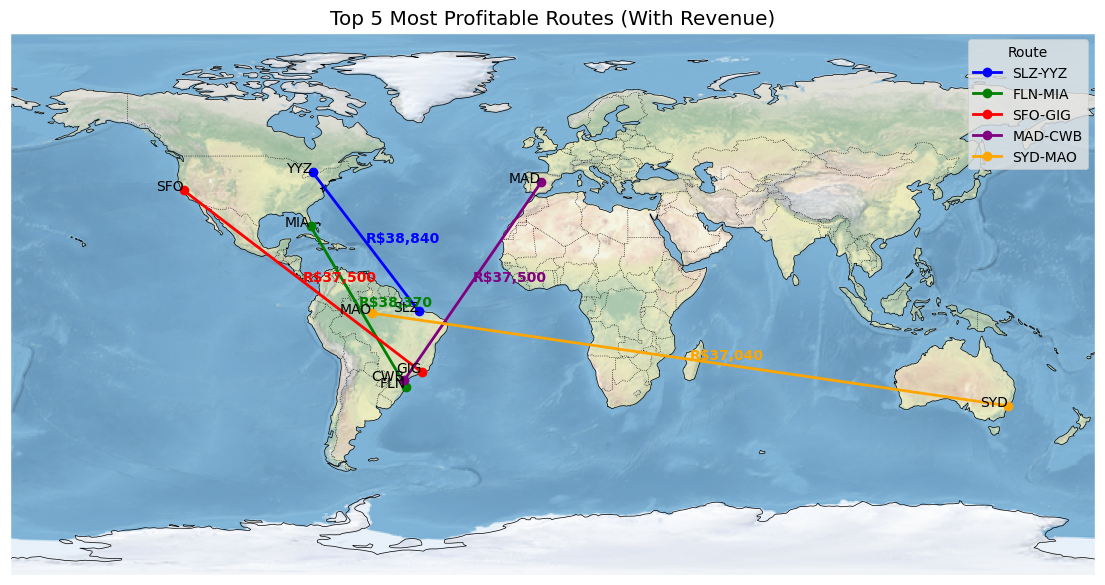

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Atualizar coordenadas e dados de receita para o novo top 5
airport_coordinates = {
    'SLZ': (-44.30, -2.53),
    'YYZ': (-79.63, 43.68),
    'FLN': (-48.55, -27.60),
    'MIA': (-80.29, 25.76),
    'SFO': (-122.38, 37.62),
    'GIG': (-43.25, -22.81),
    'MAD': (-3.70, 40.41),
    'CWB': (-49.23, -25.43),
    'SYD': (151.21, -33.86),
    'MAO': (-60.03, -3.10)
}

top_5_routes_revenue = {
    ('SLZ', 'YYZ'): 38840,
    ('FLN', 'MIA'): 38370,
    ('SFO', 'GIG'): 37500,
    ('MAD', 'CWB'): 37500,
    ('SYD', 'MAO'): 37040
}

# Configuração do mapa com Cartopy para exibir as rotas
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()

# Adicionar linhas de costa e fronteiras do país
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Cores para cada rota
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plotar rotas e adicionar rótulos de receita
for i, ((origin, destination), revenue) in enumerate(top_5_routes_revenue.items()):
    origin_coord = airport_coordinates[origin]
    destination_coord = airport_coordinates[destination]

    # Plotar linha para a rota com uma cor específica
    ax.plot(
        [origin_coord[0], destination_coord[0]],
        [origin_coord[1], destination_coord[1]],
        color=colors[i], linewidth=2, marker='o', transform=ccrs.PlateCarree(), label=f"{origin}-{destination}"
    )

    # Adicionar rótulo de receita no ponto médio da linha
    mid_x = (origin_coord[0] + destination_coord[0]) / 2
    mid_y = (origin_coord[1] + destination_coord[1]) / 2
    ax.text(mid_x, mid_y, f"R${revenue:,.0f}", color=colors[i], fontsize=10, weight='bold', transform=ccrs.PlateCarree())

    # Adicionar rótulos nos pontos de origem e destino
    ax.text(origin_coord[0], origin_coord[1], origin, transform=ccrs.PlateCarree(), ha='right')
    ax.text(destination_coord[0], destination_coord[1], destination, transform=ccrs.PlateCarree(), ha='right')

# Título e legenda
plt.title("Top 5 Most Profitable Routes (With Revenue)")
plt.legend(title='Route')
plt.show()


# Application of Machine Learning Models for Forecasting

In this section, we’ll apply the Prophet model for forecasting extra baggage revenue. Prophet was chosen because of its strengths in handling time series data with strong seasonality and holiday effects, as well as its robustness in managing missing data and outliers.

### Why Prophet?
Prophet, developed by Facebook, is particularly suited for this project due to:
- **Seasonality and Trend Analysis**: Prophet automatically detects and integrates seasonal patterns and trends, ideal for aviation data with recurring travel patterns.
- **Incorporation of Holidays and Events**: Prophet allows the inclusion of holiday data, essential for capturing peaks in passenger demand around national holidays and high seasons.
- **Customizability**: It offers flexibility to adjust seasonal components, making it adaptable for complex datasets like ours.

### Workflow:
1. **Feature Engineering**: Preparing the dataset by selecting and creating relevant features.
2. **Model Training and Evaluation**: Training the Prophet model with historical data, tuning it to optimize for accuracy.
3. **Forecasting**: Using the trained model to generate 24-month predictions for extra baggage revenue.

The insights from these forecasts are expected to support strategic planning and revenue management by anticipating revenue trends and demand shifts.




In [22]:
!pip install prophet


In [23]:
from prophet import Prophet
import pandas as pd

# Ensuring 'Data_Voo' column is in datetime format and creating a monthly revenue database
df['Data_Voo'] = pd.to_datetime(df['Data_Voo'])
df_receita = df.groupby(pd.Grouper(key='Data_Voo', freq='M'))['Receita_Bagagem_Extra'].sum().reset_index()
df_receita.columns = ['ds', 'y']  # Prophet requires columns named 'ds' for dates and 'y' for values

# Creating and fitting the model for extra baggage revenue
model_receita = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_receita.fit(df_receita)

# Creating a DataFrame for future dates (next 24 months) for revenue forecasting
future_receita = model_receita.make_future_dataframe(periods=24, freq='M')

# Generating revenue forecasts
forecast_receita = model_receita.predict(future_receita)

# Creating a monthly passenger database
df_passageiros = df.groupby(pd.Grouper(key='Data_Voo', freq='M'))['Passageiro_ID'].nunique().reset_index()
df_passageiros.columns = ['ds', 'y']  # 'ds' for dates, 'y' for unique passenger count

# Creating and fitting the model for the number of passengers
model_passageiros = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_passageiros.fit(df_passageiros)

# Creating a DataFrame for future dates (next 24 months) for passenger forecasting
future_passageiros = model_passageiros.make_future_dataframe(periods=24, freq='M')

# Generating forecasts for the number of passengers
forecast_passageiros = model_passageiros.predict(future_passageiros)

# Extracting future forecasts for analysis
future_forecast_receita = forecast_receita[['ds', 'yhat']].copy()
future_forecast_receita.rename(columns={'yhat': 'Predicted_Revenue'}, inplace=True)

future_forecast_passageiros = forecast_passageiros[['ds', 'yhat']].copy()
future_forecast_passageiros.rename(columns={'yhat': 'Predicted_Passengers'}, inplace=True)

# Combining both revenue and passenger forecasts into a single DataFrame
combined_forecast = future_forecast_receita.merge(future_forecast_passageiros, on='ds')
combined_forecast.head()  # Displaying the first few rows of the combined forecast


<ipython-input-23-ae2139c3e135>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wp38du3/dj7ofwv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wp38du3/h7av1lzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76203', 'data', 'file=/tmp/tmp3wp38du3/dj7ofwv6.json', 'init=/tmp/tmp3wp38du3/h7av1lzc.json', 'output', 'file=/tmp/tmp3wp38du3/prophet_modelevle7ybb/prophet_model-20241103013751.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:37:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:38:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist

,ds,Predicted_Revenue,Predicted_Passengers
0,2023-01-31,3.043584e+09,142670.983374
1,2023-02-28,2.419078e+09,123946.033524
2,2023-03-31,2.880477e+09,140227.075960
3,2023-04-30,2.907279e+09,138696.919233
4,2023-05-31,3.107060e+09,145516.279662


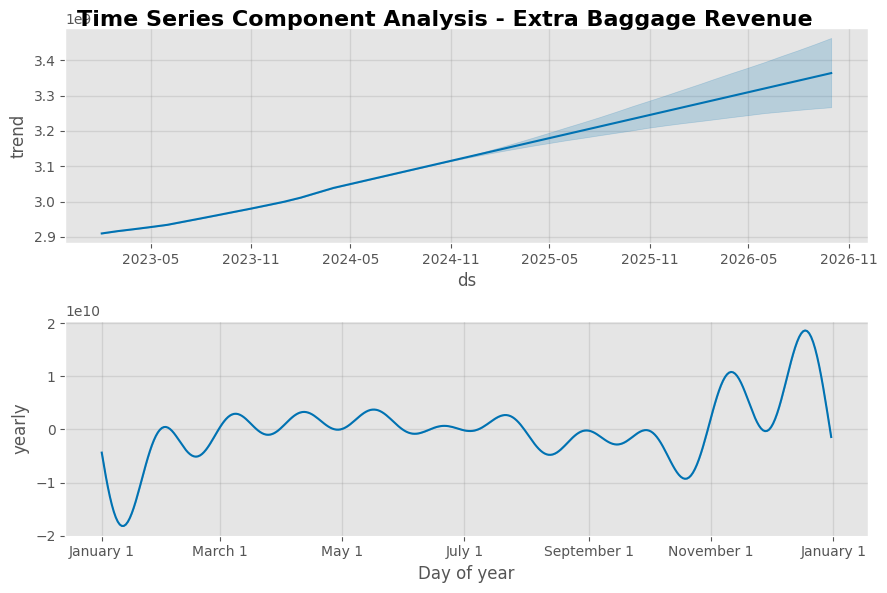

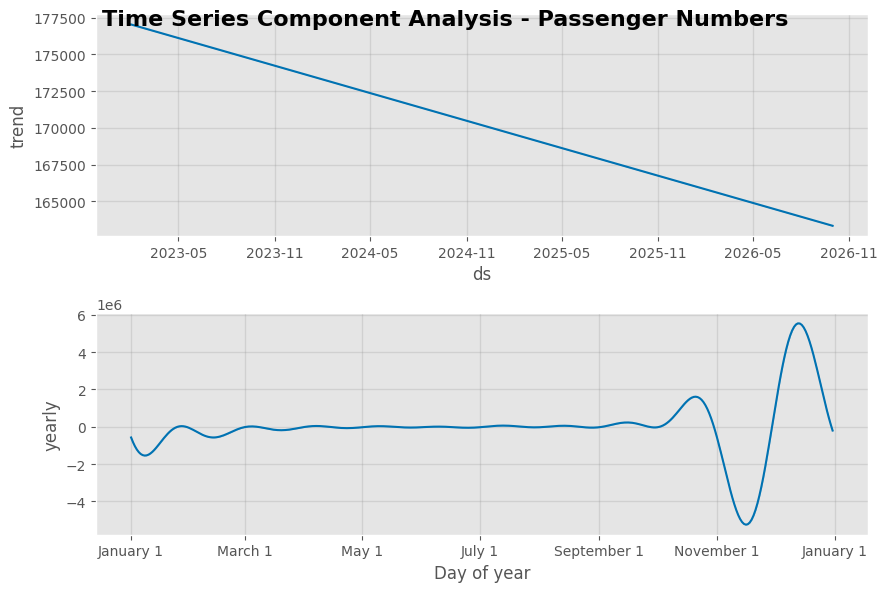

In [24]:
from prophet.plot import plot_components
import matplotlib.pyplot as plt

# Component analysis for extra baggage revenue
fig_receita = model_receita.plot_components(forecast_receita)
fig_receita.suptitle('Time Series Component Analysis - Extra Baggage Revenue', fontsize=16, weight='bold')

# Component analysis for the number of passengers
fig_passageiros = model_passageiros.plot_components(forecast_passageiros)
fig_passageiros.suptitle('Time Series Component Analysis - Passenger Numbers', fontsize=16, weight='bold')

plt.show()


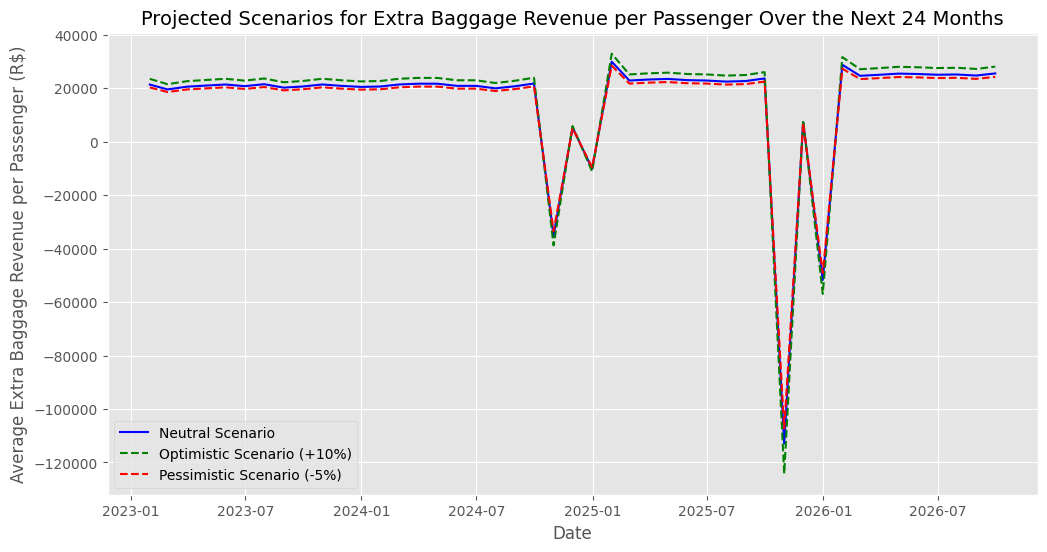

In [26]:
# Create the column for average extra baggage revenue per passenger based on forecasts
combined_forecast['Revenue_Per_Passenger'] = combined_forecast['Predicted_Revenue'] / combined_forecast['Predicted_Passengers']

# Calculate optimistic (+10%) and pessimistic (-5%) scenarios
combined_forecast['Optimistic_Scenario'] = combined_forecast['Revenue_Per_Passenger'] * 1.10
combined_forecast['Pessimistic_Scenario'] = combined_forecast['Revenue_Per_Passenger'] * 0.95

# Visualize the projected scenarios
plt.figure(figsize=(12, 6))
plt.plot(combined_forecast['ds'], combined_forecast['Revenue_Per_Passenger'], label='Neutral Scenario', color='blue')
plt.plot(combined_forecast['ds'], combined_forecast['Optimistic_Scenario'], label='Optimistic Scenario (+10%)', color='green', linestyle='--')
plt.plot(combined_forecast['ds'], combined_forecast['Pessimistic_Scenario'], label='Pessimistic Scenario (-5%)', color='red', linestyle='--')

# Titles and labels in English
plt.title("Projected Scenarios for Extra Baggage Revenue per Passenger Over the Next 24 Months", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Extra Baggage Revenue per Passenger (R$)")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-27-c428d0796fe4>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wp38du3/9b4pf_wg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3wp38du3/7pr41xqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90303', 'data', 'file=/tmp/tmp3wp38du3/9b4pf_wg.json', 'init=/tmp/tmp3wp38du3/7pr41xqs.json', 'output', 'file=/tmp/tmp3wp38du3/prophet_modelnt8iwp0b/prophet_model-20241103014306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist

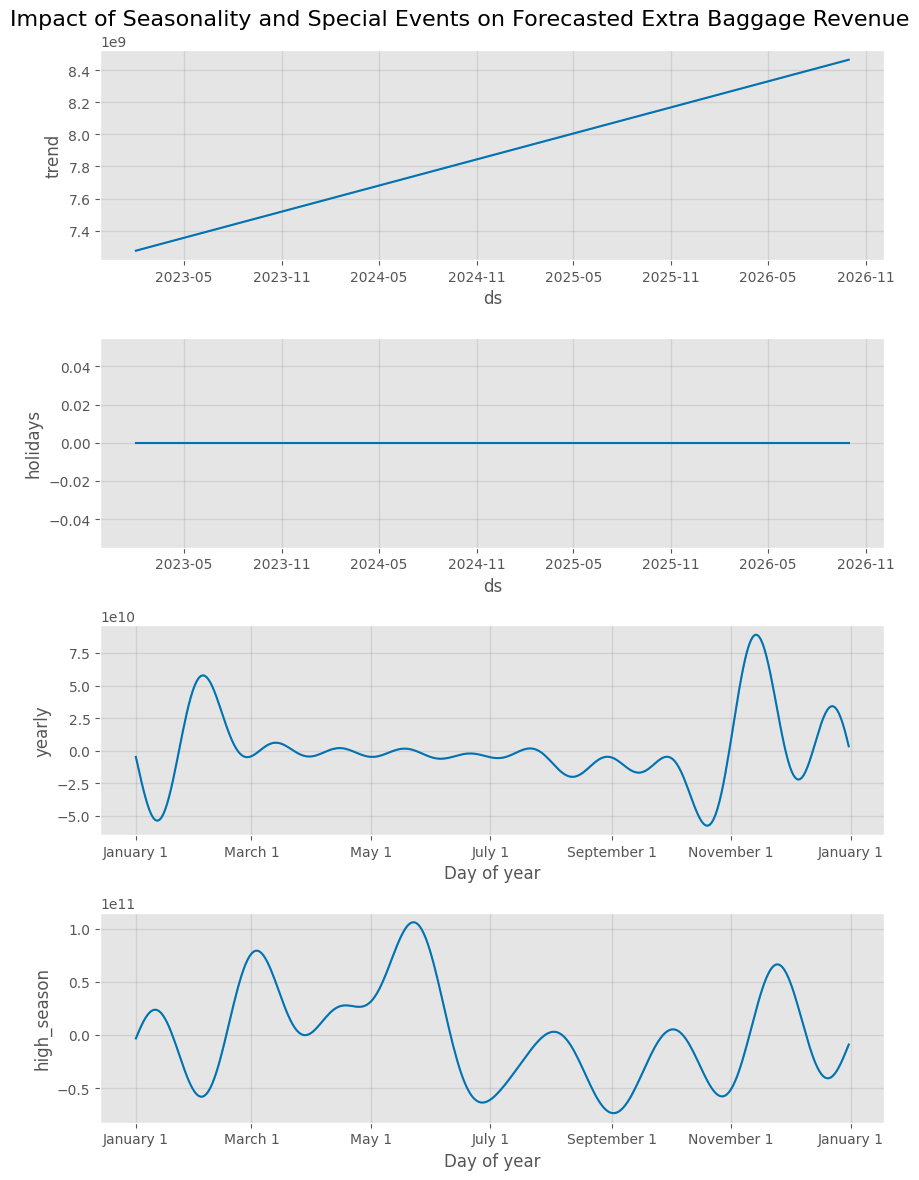

In [27]:
# Ensure dates are formatted and create a monthly revenue base
df['Data_Voo'] = pd.to_datetime(df['Data_Voo'])
df_revenue = df.groupby(pd.Grouper(key='Data_Voo', freq='M'))['Receita_Bagagem_Extra'].sum().reset_index()
df_revenue.columns = ['ds', 'y']

# Add holidays
holidays = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.to_datetime([
        '2023-01-01', '2023-02-20', '2023-04-07', '2023-05-01', '2023-09-07', '2023-10-12', '2023-11-15', '2023-12-25',
        '2024-01-01', '2024-02-12', '2024-03-29', '2024-05-01', '2024-09-07', '2024-10-12', '2024-11-15', '2024-12-25'
    ]),
    'lower_window': 0,
    'upper_window': 1
})

# Set up the Prophet model with yearly seasonality and holidays
model_revenue = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, holidays=holidays)
model_revenue.add_seasonality(name='high_season', period=365.25, fourier_order=10, condition_name='high_season')
df_revenue['high_season'] = df_revenue['ds'].dt.month.isin([1, 7, 12]).astype(int)
model_revenue.fit(df_revenue)

# Create a DataFrame with future dates and project revenue for the next 24 months
future_revenue = model_revenue.make_future_dataframe(periods=24, freq='M')
future_revenue['high_season'] = future_revenue['ds'].dt.month.isin([1, 7, 12]).astype(int)
forecast_revenue = model_revenue.predict(future_revenue)

# Plot forecast components, including the impact of high season and holidays
fig = model_revenue.plot_components(forecast_revenue)
fig.suptitle("Impact of Seasonality and Special Events on Forecasted Extra Baggage Revenue", fontsize=16)
plt.tight_layout()
plt.show()


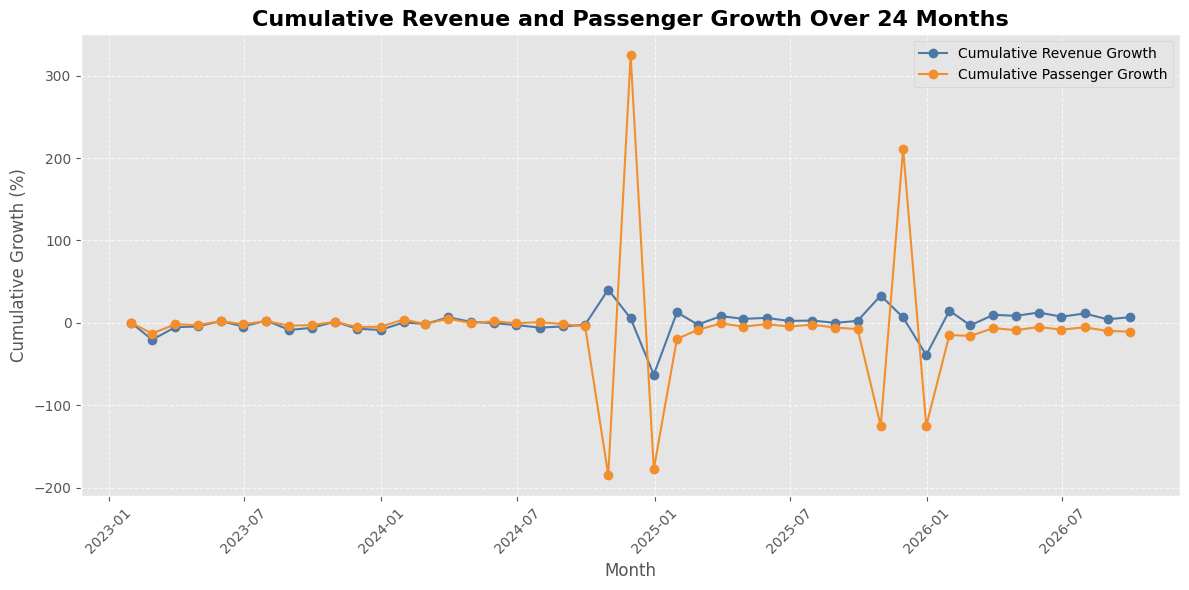

In [29]:
# Calculate cumulative growth of revenue and passengers relative to the first month of the forecast
combined_forecast['Cumulative_Revenue_Growth'] = (
    (combined_forecast['Predicted_Revenue'] / combined_forecast['Predicted_Revenue'].iloc[0] - 1) * 100
)
combined_forecast['Cumulative_Passenger_Growth'] = (
    (combined_forecast['Predicted_Passengers'] / combined_forecast['Predicted_Passengers'].iloc[0] - 1) * 100
)

# Plot cumulative growth
plt.figure(figsize=(12, 6))
plt.plot(combined_forecast['ds'], combined_forecast['Cumulative_Revenue_Growth'], label='Cumulative Revenue Growth', color='#4E79A7', marker='o')
plt.plot(combined_forecast['ds'], combined_forecast['Cumulative_Passenger_Growth'], label='Cumulative Passenger Growth', color='#F28E2B', marker='o')

# Titles and labels
plt.title('Cumulative Revenue and Passenger Growth Over 24 Months', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Growth (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


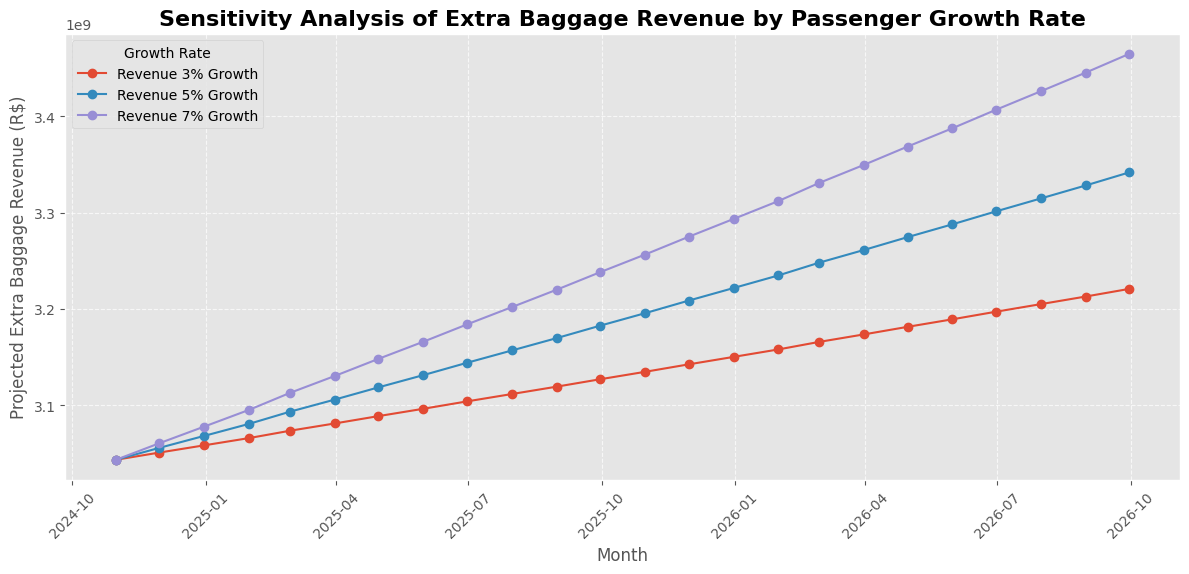

In [30]:
# Initial values
base_passengers = combined_forecast['Predicted_Passengers'].iloc[0]
base_revenue = combined_forecast['Predicted_Revenue'].iloc[0]

# Annual growth scenarios (3%, 5%, 7%)
annual_growth_rates = [0.03, 0.05, 0.07]

# Filter forecasts for the next 24 months
future_dates = combined_forecast['ds'][-24:].reset_index(drop=True)
sensitivity_revenue = pd.DataFrame({'ds': future_dates})

for rate in annual_growth_rates:
    # Calculate the number of passengers for each growth rate over the 24 months
    sensitivity_passengers = base_passengers * (1 + rate) ** (np.arange(24) / 12)

    # Assuming extra baggage revenue grows proportionally with the number of passengers
    sensitivity_revenue[f'Revenue_{int(rate * 100)}%_Growth'] = base_revenue * (sensitivity_passengers / base_passengers)

plt.figure(figsize=(12, 6))

for column in sensitivity_revenue.columns[1:]:
    plt.plot(sensitivity_revenue['ds'], sensitivity_revenue[column], marker='o', label=column.replace('_', ' '))

plt.title('Sensitivity Analysis of Extra Baggage Revenue by Passenger Growth Rate', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Projected Extra Baggage Revenue (R$)', fontsize=12)
plt.legend(title='Growth Rate')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
